In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from time import time

from sklearn.manifold import TSNE
from PIL import Image
import cv2

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
module_path = os.path.abspath(os.path.join('..\\Spyder'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
np.random.seed(50)

# load data images
styles_csv = pd.read_csv(r"./dataset/Fashion_Produst_Images" + "\\styles.csv", error_bad_lines=False)

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

In [4]:
styles_csv.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [5]:
len(styles_csv.articleType.unique())

143

In [6]:
styles_csv.shape

(44424, 10)

In [7]:
styles_csv.articleType.value_counts()[styles_csv.articleType.value_counts() > 1]

Tshirts               7067
Shirts                3217
Casual Shoes          2845
Watches               2542
Sports Shoes          2036
                      ... 
Hat                      3
Rain Trousers            2
Face Serum and Gel       2
Ties and Cufflinks       2
Key chain                2
Name: articleType, Length: 136, dtype: int64

Take first 20 article types

In [8]:
reduced_articleType_list = styles_csv.articleType.value_counts()[:20].index

In [9]:
sum(styles_csv.articleType.value_counts()[:20])

33146

In [10]:
PATH_TO_DATASET_IMAGES = ".\\dataset\\Fashion_Produst_Images\\" + "images\\"

In [11]:
reduced_articleType_list

Index(['Tshirts', 'Shirts', 'Casual Shoes', 'Watches', 'Sports Shoes',
       'Kurtas', 'Tops', 'Handbags', 'Heels', 'Sunglasses', 'Wallets',
       'Flip Flops', 'Sandals', 'Briefs', 'Belts', 'Backpacks', 'Socks',
       'Formal Shoes', 'Perfume and Body Mist', 'Jeans'],
      dtype='object')

In [12]:
map_for_reduced_articleType_list = ['Majca kratkih rukava', 'Košulja', 'Patike', 'Sat', 'Sportske patike', 'Haljina', 'Majca bez rukava',
                                    'Torba',
                                   'Potpetice', 'Naočare', 'Novčanik', ' Papuče', 'Sandale', 'Veš', 'Kaiš', 'Ranac', 'Čarape', 'Cipele',
                                    'Parfem', 'Farmerke'
                                   ]

Load images

Error reading image
Error reading image
Error reading image
Error reading image


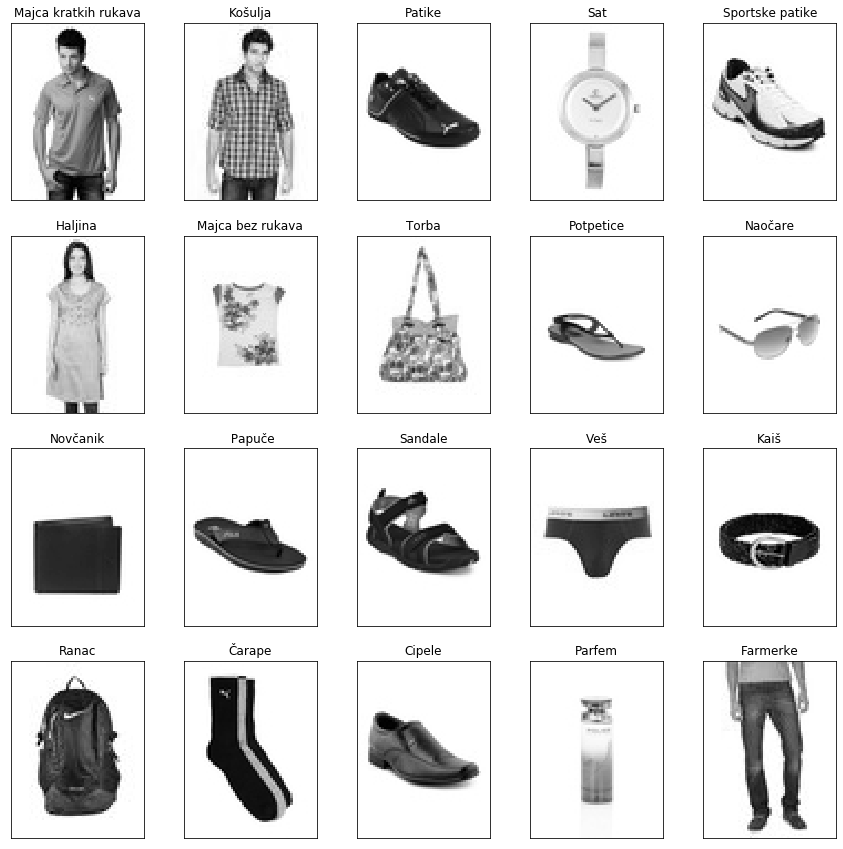

In [13]:
list_of_images = []
list_of_ids = []
list_of_types = []
list_of_genders = []
n_images = 1000
random_state = 10
fig = plt.figure(figsize= (15,15))
counter = 1
for articleType in reduced_articleType_list:
    images_random_sample = styles_csv.loc[styles_csv.articleType == articleType, ['id','gender','articleType']]
    # load images by ids and show 1 representative pic
    first_pic = True
    articleType_map = map_for_reduced_articleType_list[counter-1]
    for i, index in enumerate(images_random_sample['id']):
        image = np.array(cv2.imread(PATH_TO_DATASET_IMAGES + str(index) + ".jpg"))
        try:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            list_of_ids = list_of_ids + list(images_random_sample.loc[images_random_sample.id == index, 'id'])
            list_of_types.append(articleType_map)
            list_of_genders = list_of_genders + list(images_random_sample.loc[images_random_sample.id == index, 'gender'])
            
        except:
            print('Error reading image')
            continue
        if first_pic:
            plt.subplot(4,5,counter)
            counter+=1
            plt.imshow(image, cmap='gray', vmin=0, vmax=255)
            plt.title(articleType_map)
            plt.xticks([]),  plt.yticks([])
            first_pic = False
        list_of_images.append(image)
plt.show()
    
    

Take 64 random sample images

In [15]:
random_sample_idxs = images_random_sample.reset_index().sample(64).index

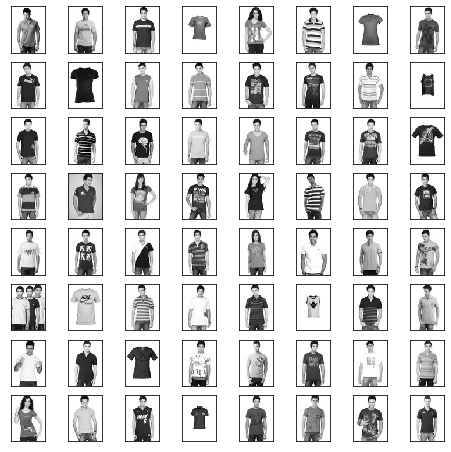

In [16]:
# initial visualization
fig = plt.figure(figsize= (8,8))
for i in range(len(random_sample_idxs)):
    plt.subplot(8,8,i+1)
    plt.imshow(list_of_images[i], cmap = plt.cm.gray, interpolation='nearest')
    #plt.text(x= 0.08, y = 3.5, s = y_sample.iloc[i, 0])
    plt.xticks([]),  plt.yticks([])

In [17]:
X = np.zeros((len(list_of_images), list_of_images[0].shape[0] *list_of_images[0].shape[1]))
height = 80
width = 60
conunt = 1
for i, image in enumerate(list_of_images):
    if (list_of_images[i].shape[0] != height) or (list_of_images[i].shape[1] != width):
        conunt +=1 
        list_of_images[i] = cv2.resize(image,(width, height))
    X[i,:] = list_of_images[i].ravel()

In [18]:
X.shape

(33142, 4800)

In [19]:
33142/44424

0.7460381775616783

Reduce input data to 30 dimension by using PCA

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30, random_state = random_state)
X_pca = pca.fit_transform(X)


Fit t-SNE

In [21]:
t_SNE = TSNE(n_components = 2, perplexity = 40, method = "barnes_hut", early_exaggeration=12.0, random_state = 1, verbose = 1)

In [22]:
X_trans = t_SNE.fit_transform(X_pca)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 33142 samples in 0.246s...
[t-SNE] Computed neighbors for 33142 samples in 14.676s...
[t-SNE] Computed conditional probabilities for sample 1000 / 33142
[t-SNE] Computed conditional probabilities for sample 2000 / 33142
[t-SNE] Computed conditional probabilities for sample 3000 / 33142
[t-SNE] Computed conditional probabilities for sample 4000 / 33142
[t-SNE] Computed conditional probabilities for sample 5000 / 33142
[t-SNE] Computed conditional probabilities for sample 6000 / 33142
[t-SNE] Computed conditional probabilities for sample 7000 / 33142
[t-SNE] Computed conditional probabilities for sample 8000 / 33142
[t-SNE] Computed conditional probabilities for sample 9000 / 33142
[t-SNE] Computed conditional probabilities for sample 10000 / 33142
[t-SNE] Computed conditional probabilities for sample 11000 / 33142
[t-SNE] Computed conditional probabilities for sample 12000 / 33142
[t-SNE] Computed conditional probabilities for s

In [23]:
reduces_styles = pd.DataFrame(data = list(zip(list_of_ids,list_of_types,list_of_genders)), columns= ['id','articleType','gender'])

In [24]:
reduces_styles

,id,articleType,gender
0,53759,Majca kratkih rukava,Men
1,1855,Majca kratkih rukava,Men
2,7990,Majca kratkih rukava,Men
3,4729,Majca kratkih rukava,Boys
4,3954,Majca kratkih rukava,Women
...,...,...,...
33137,11335,Farmerke,Men
33138,31164,Farmerke,Boys
33139,27001,Farmerke,Women
33140,23455,Farmerke,Men


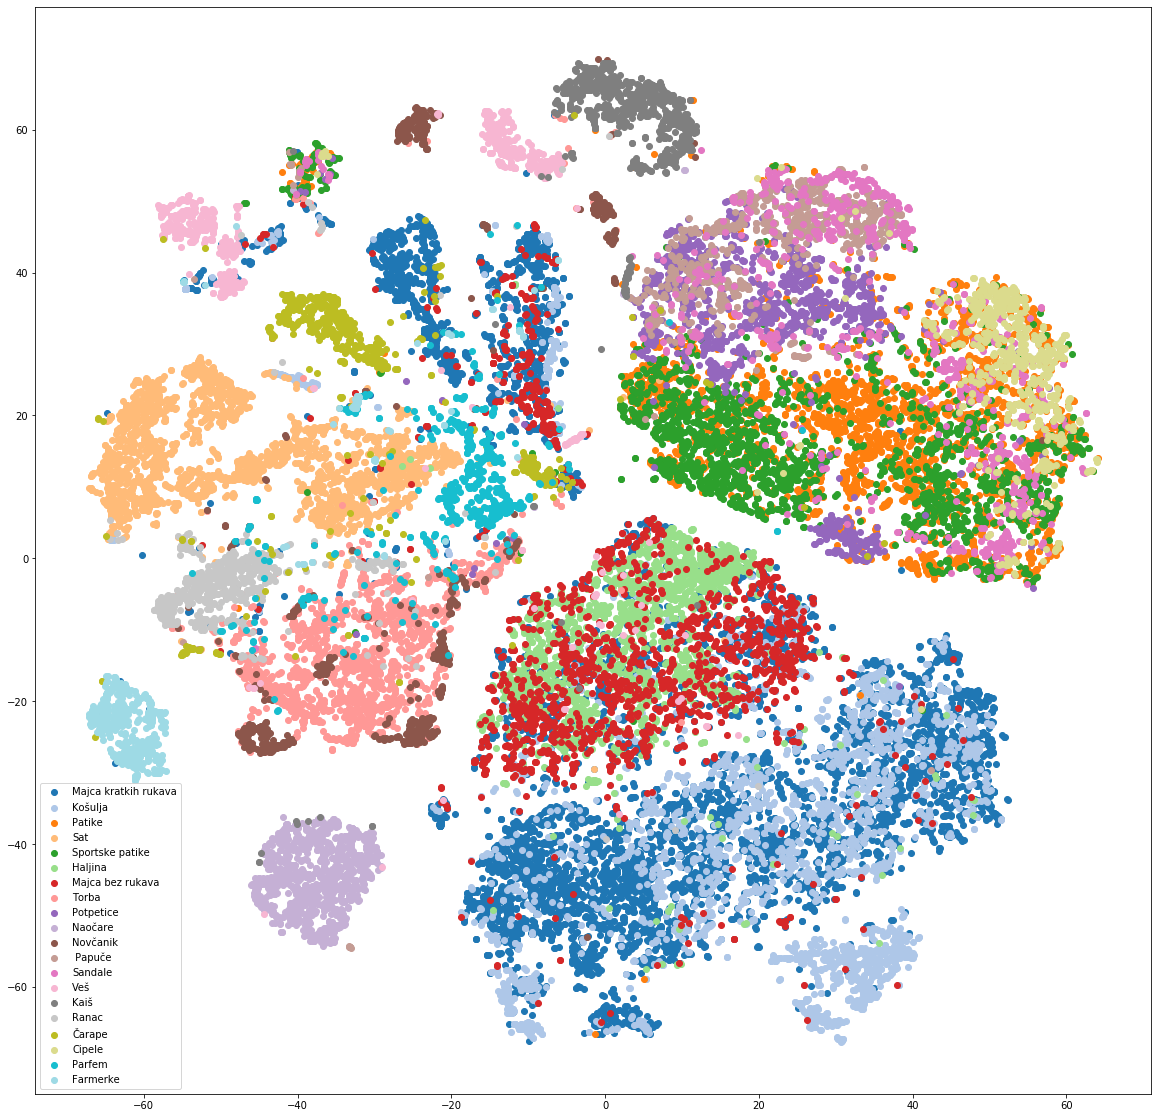

In [25]:
number = len(reduced_articleType_list)
cmap = plt.get_cmap('tab20')
colors = [cmap(i) for i in np.linspace(0, 1, number)]
plt.figure(figsize = (20,20))
for i, articleType in enumerate(map_for_reduced_articleType_list):
    plt.scatter(X_trans[reduces_styles.articleType == articleType,0], X_trans[reduces_styles.articleType == articleType,1], color = colors[i])
plt.legend(map_for_reduced_articleType_list)
plt.show()